In [32]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('bmh')
import seaborn as sns

import statsmodels.api as sm
import pingouin as pg
from scipy import stats

import os
os.chdir('C:/Users/j_hor/Documents/Coderhouse/Data Science/Data/Raw')
df = pd.read_csv('CarPrice_Assignment.csv')

In [2]:
# DataFrame´s columns. For reference visit https://www.kaggle.com/hellbuoy/car-price-prediction?select=Data+Dictionary+-+carprices.xlsx
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [3]:
print(df.shape)
df.head()

(205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
# Checking values
df.isnull().sum().sort_values(ascending=False)

car_ID              0
symboling           0
highwaympg          0
citympg             0
peakrpm             0
horsepower          0
compressionratio    0
stroke              0
boreratio           0
fuelsystem          0
enginesize          0
cylindernumber      0
enginetype          0
curbweight          0
carheight           0
carwidth            0
carlength           0
wheelbase           0
enginelocation      0
drivewheel          0
carbody             0
doornumber          0
aspiration          0
fueltype            0
CarName             0
price               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


# Normality Analysis

## Car Price

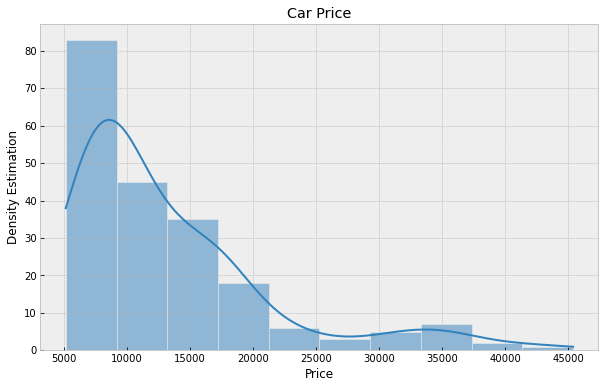

In [8]:
# Histplot is tailed between 5000 and 14000. We could also infer that are many outliers.
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(data=df, x=df.price, bins=10, color="#3182bd", alpha=0.5, kde=True)
ax.set_title('Car Price')
ax.set_xlabel('Price')
ax.set_ylabel('Density Estimation');

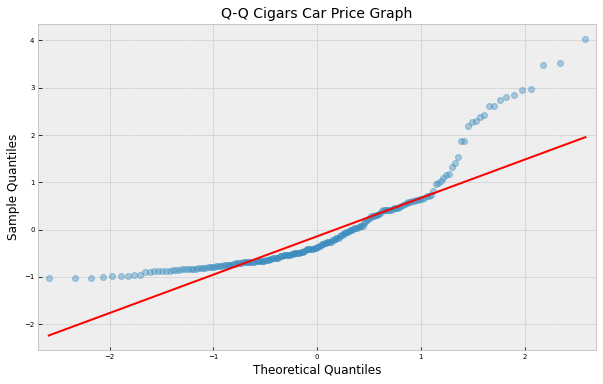

In [9]:
# Observations does not adjust to theoretical quantiles line on both ends of the sample
fig, ax = plt.subplots(figsize=(10,6))
sm.qqplot(
    df.price,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Q-Q Cigars Car Price Graph', fontsize = 14)
ax.tick_params(labelsize = 7)

In [10]:
# Kurtosis value shows clear deviation from normality, but not extreme.
kurtosis = stats.kurtosis(df.price)
skewness = stats.skew(df.price)
print(kurtosis)
print(skewness)

2.94859776828671
1.7646442265113236


In [12]:
# D'Agostino's K-squared test
k2, p_value = stats.normaltest(df.price)
print(k2)
print(p_value)

77.37514013383584
1.578344501676757e-17


In [ ]:
# There is no evidence to reject null hypothesis/normality distribution for this sample (p-values far away from 0.05 mark; considerable n-sample -205-) 

# Homocedasticity Analysis

## Car Price by door number

In [13]:
df.groupby('doornumber')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
doornumber,,,,,,,,
four,115.0,13501.152174,7338.296321,6229.0,8006.0,10898.0,16872.50,40960.0
two,90.0,12989.924078,8784.227805,5118.0,7171.5,9927.0,15909.75,45400.0


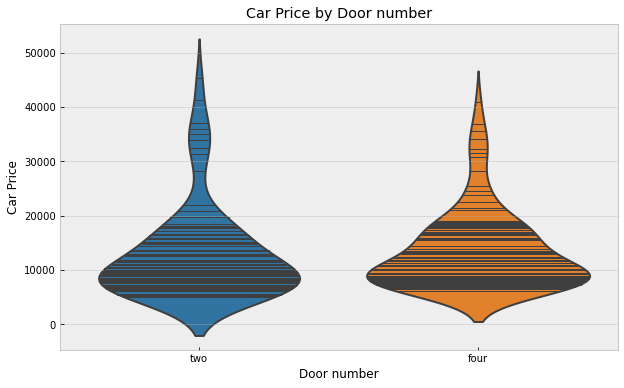

In [14]:
# It seems both samples have similar distributions
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(
               x = df.doornumber,
               y = df.price,
            data = df,
         palette = 'tab10',
           inner = 'stick'
            )
ax.set_title('Car Price by Door number')
ax.set_xlabel('Door number')
ax.set_ylabel('Car Price');

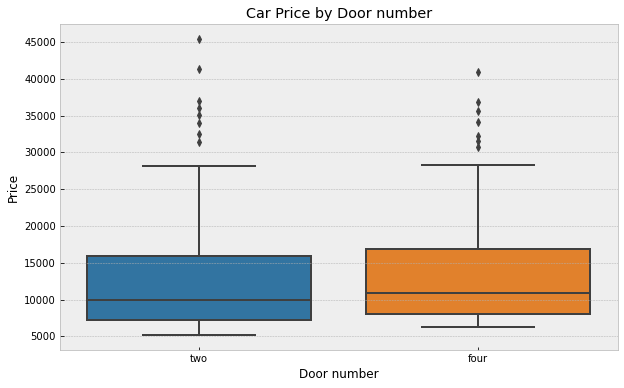

In [15]:
# As predicted, there are outliers
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(
            x = df.doornumber,
            y = df.price,
         data = df,
      palette = 'tab10',
           ax = ax
            )
ax.set_title('Car Price by Door number')
ax.set_xlabel('Door number')
ax.set_ylabel('Price');

In [16]:
# Bartlett Test. Warning: P-Value near 0.05.
two_doors = df[df.doornumber=='two']
two_doors = two_doors.price
four_doors = df[df.doornumber=='four']
four_doors = four_doors.price

bartlett_test = stats.bartlett(two_doors, four_doors)
bartlett_test

BartlettResult(statistic=3.2476828208682487, pvalue=0.07152450591455789)

In [44]:
# Levene Test. I chose mean center, recommended for symmetric, moderate-tailed distributions. 
# According to this P-Value, homocedasticity can not be dismissed.
levene_test_mean = stats.levene(two_doors, four_doors, center='mean')
levene_test_mean

LeveneResult(statistic=1.0203970283321402, pvalue=0.3136273644369519)

# Correlation EDA

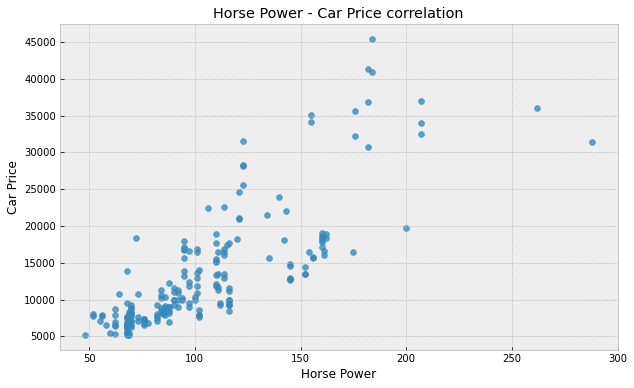

In [19]:
# Horse Power - Car Price
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x=df.horsepower, y=df.price, alpha= 0.8)
ax.set_title('Horse Power - Car Price correlation')
ax.set_xlabel('Horse Power')
ax.set_ylabel('Car Price');

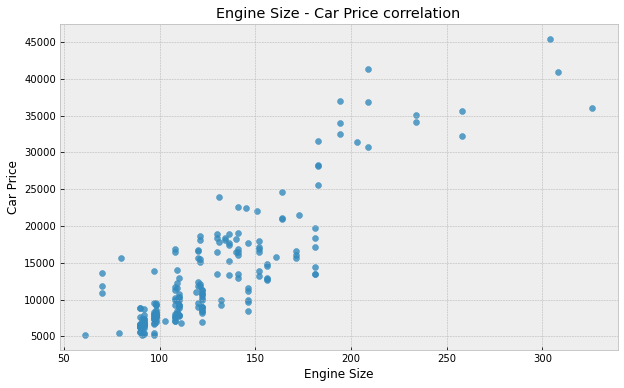

In [20]:
# Engine Size - Car Price
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x=df.enginesize, y=df.price, alpha= 0.8)
ax.set_title('Engine Size - Car Price correlation')
ax.set_xlabel('Engine Size')
ax.set_ylabel('Car Price');

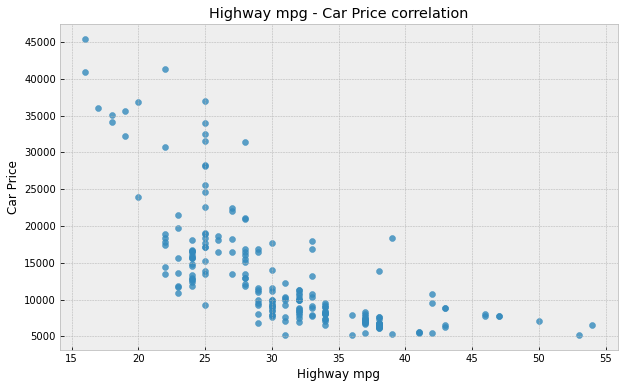

In [24]:
# Highway MPG - Car Price
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x=df.highwaympg, y=df.price, alpha= 0.8)
ax.set_title('Highway mpg - Car Price correlation')
ax.set_xlabel('Highway mpg')
ax.set_ylabel('Car Price');

# Calculating Correlations

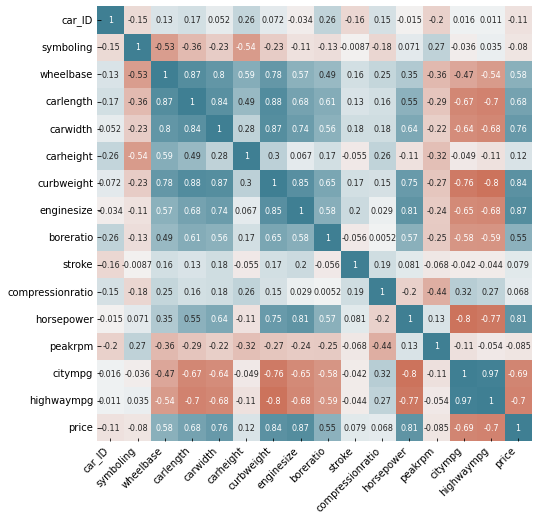

In [57]:
# Heatmap
matrix_correlation = df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(
    matrix_correlation,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)
ax.tick_params(labelsize = 10)

In [26]:
# Pearson Correlations
df.corr(method='pearson')['price']

car_ID             -0.109093
symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

In [27]:
# Spearman Correlations. I included it because of deviation evidence from normality and outliers presence.
df.corr(method='spearman')['price']

car_ID              0.020485
symboling          -0.144684
wheelbase           0.681773
carlength           0.804316
carwidth            0.811401
carheight           0.242769
curbweight          0.909067
enginesize          0.825996
boreratio           0.643772
stroke              0.111343
compressionratio   -0.173646
horsepower          0.854610
peakrpm            -0.066281
citympg            -0.829479
highwaympg         -0.822729
price               1.000000
Name: price, dtype: float64

In [37]:
# Correlation between feature pairs, including statistical significance.
# Engine Size - Car Price
pg.corr(df.enginesize, df.price, method='pearson')

,n,r,CI95%,p-val,BF10,power
pearson,205,0.874145,"[0.84, 0.9]",1.354764e-65,9.89e+61,1.0


In [38]:
pg.corr(df.enginesize, df.price, method='spearman')

,n,r,CI95%,p-val,power
spearman,205,0.825996,"[0.78, 0.87]",1.943726e-52,1.0


In [39]:
# Horsepower - Car Price
pg.corr(df.horsepower, df.price, method='pearson')

,n,r,CI95%,p-val,BF10,power
pearson,205,0.808139,"[0.75, 0.85]",1.483437e-48,1.432e+45,1.0


In [40]:
pg.corr(df.horsepower, df.price, method='spearman')

,n,r,CI95%,p-val,power
spearman,205,0.85461,"[0.81, 0.89]",1.096765e-59,1.0


In [41]:
# Highway mpg - Car Price
pg.corr(df.highwaympg, df.price, method='pearson')

,n,r,CI95%,p-val,BF10,power
pearson,205,-0.697599,"[-0.76, -0.62]",3.230681e-31,1.12e+28,1.0


In [42]:
pg.corr(df.highwaympg, df.price, method='spearman')

,n,r,CI95%,p-val,power
spearman,205,-0.822729,"[-0.86, -0.77]",1.074957e-51,1.0


# Partial Correlations

In [52]:
# Engine Size - Car Price, blocking Horse Power
pg.partial_corr(data=df, x='enginesize', y='price', covar='horsepower', method='pearson')

,n,r,CI95%,p-val
pearson,205,0.635837,"[0.55, 0.71]",1.663121e-24


In [54]:
pg.partial_corr(data=df, x='enginesize', y='price', covar='horsepower', method='spearman')

,n,r,CI95%,p-val
spearman,205,0.427194,"[0.31, 0.53]",1.864678e-10


In [53]:
# Highway mpg - Car Price, blocking Horse Power
pg.partial_corr(data=df, x='highwaympg', y='price', covar='horsepower', method='pearson')

,n,r,CI95%,p-val
pearson,205,-0.199493,"[-0.33, -0.06]",0.004228


In [55]:
pg.partial_corr(data=df, x='highwaympg', y='price', covar='horsepower', method='spearman')

,n,r,CI95%,p-val
spearman,205,-0.27258,"[-0.4, -0.14]",0.00008
